# Retail Giant- Sales Forcasting

### Business problem

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.


As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

In [1]:
# Importing the required librarries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data

df = pd.read_csv('Global+Superstore+Data.csv')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
# Number of rows and columsn

df.shape

(51290, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


## Data Preparation

In [5]:
#Changing the 'order Date' Dtype to datetime

df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.0+ MB


In [7]:
df.nunique().sort_values()

Segment           3
Market            7
Order Date       48
Sales         22995
Profit        24575
dtype: int64

In [8]:
# Creating new column called 'Market-Segment'

df['Market-Segment']= df['Market']+'-' +df['Segment']
df.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [9]:
df['Market-Segment'].value_counts()

APAC-Consumer         5699
LATAM-Consumer        5321
US-Consumer           5191
EU-Consumer           5186
APAC-Corporate        3283
EU-Corporate          3077
LATAM-Corporate       3053
US-Corporate          3020
EMEA-Consumer         2538
Africa-Consumer       2381
APAC-Home Office      2020
LATAM-Home Office     1920
US-Home Office        1783
EU-Home Office        1737
EMEA-Corporate        1574
Africa-Corporate      1312
EMEA-Home Office       917
Africa-Home Office     894
Canada-Consumer        202
Canada-Corporate       110
Canada-Home Office      72
Name: Market-Segment, dtype: int64

In [10]:
# Creating a pivot table by aggregating profit values based on the Market-Segment

df_agg = df.pivot_table(index = 'Order Date', columns = 'Market-Segment', values = 'Profit', aggfunc = 'sum')

df_agg.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [11]:
# Splitig the data frame into train and set for finding Coefficient of Variaton for the market segments

train_len = 42

train_df = df_agg[0: train_len]
test_df = df_agg[train_len:]

In [12]:
train_df.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [13]:
# Creating an empty dataframe for CoV

cov = pd.DataFrame(columns = ['Market-Segment', 'CoV'])

In [14]:
cov.head()

,Market-Segment,CoV


In [15]:
# Calculating the Coefficient of variation (Cov) for each market segments

for i in train_df.columns:
    t = {'Market-Segment': i  , 'CoV': np.std(train_df[i])/np.mean(train_df[i])}
    cov = cov.append(t, ignore_index = True)

In [16]:
# Coefficient of Variation (CoV) for each market segment sorted in the ascending order

cov.sort_values(by = 'CoV')

,Market-Segment,CoV
0,APAC-Consumer,0.522725
1,APAC-Corporate,0.530051
12,EU-Consumer,0.595215
15,LATAM-Consumer,0.683770
13,EU-Corporate,0.722076
16,LATAM-Corporate,0.882177
14,EU-Home Office,0.938072
2,APAC-Home Office,1.008219
18,US-Consumer,1.010530
19,US-Corporate,1.071829


#### As per the above table the lowest CoV value is for APAC-Consumer segment. So we can conclude that this segement is profitable than other segments. 

### Let's plot the markets, Segments and Market-segments

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


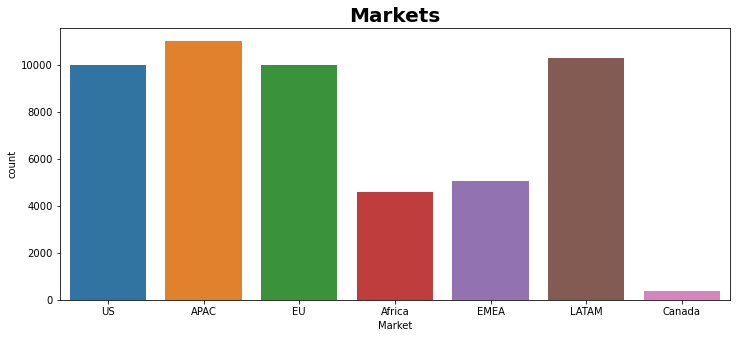

In [17]:
# Ploting count of markets

plt.figure(figsize=(12,5))
print(df.Market.value_counts())
sns.countplot(df['Market'])
plt.title('Markets', fontweight='bold', size=20)
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


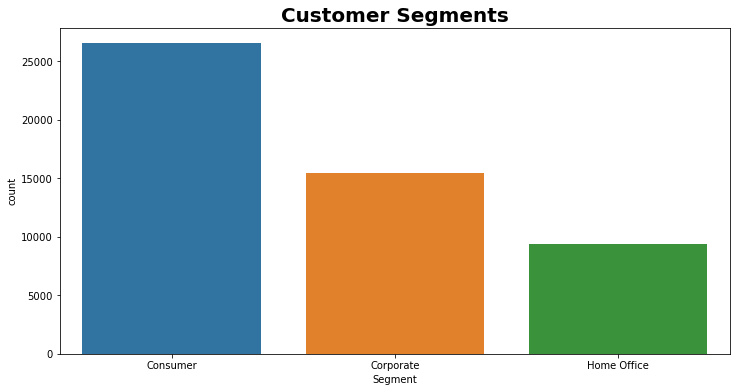

In [18]:
# ploting segements
plt.figure(figsize=(12,6))
print(df.Segment.value_counts())
sns.countplot(df['Segment'])
plt.title('Customer Segments',fontweight='bold', size=20)
plt.show()

APAC-Consumer         5699
LATAM-Consumer        5321
US-Consumer           5191
EU-Consumer           5186
APAC-Corporate        3283
EU-Corporate          3077
LATAM-Corporate       3053
US-Corporate          3020
EMEA-Consumer         2538
Africa-Consumer       2381
APAC-Home Office      2020
LATAM-Home Office     1920
US-Home Office        1783
EU-Home Office        1737
EMEA-Corporate        1574
Africa-Corporate      1312
EMEA-Home Office       917
Africa-Home Office     894
Canada-Consumer        202
Canada-Corporate       110
Canada-Home Office      72
Name: Market-Segment, dtype: int64


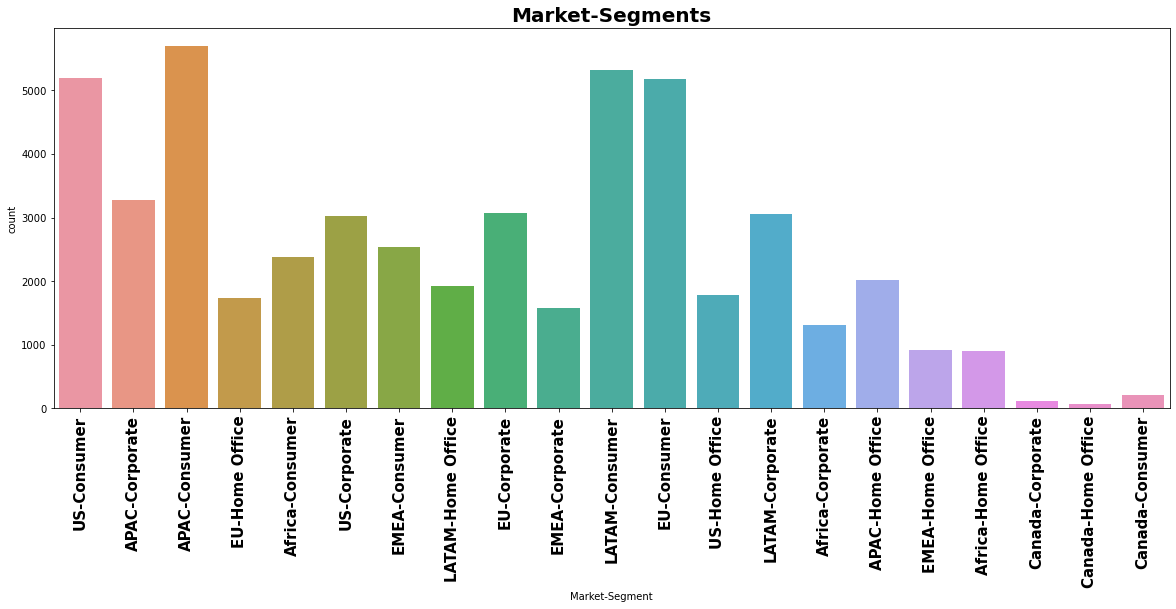

In [19]:
# Ploting the Market-Segment

plt.figure(figsize=(20,7))
print(df['Market-Segment'].value_counts())
sns.countplot(df['Market-Segment'])
plt.title('Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold", size = 15)
plt.show()

### From the above graphs the following can be observed

- Among the individual markets APAC has the highest count
- In the segments, consumer segment has the highest count
- APAC-Consumer is having the highest count among the market-segment

### Market-Segment v/s Sales and Profit

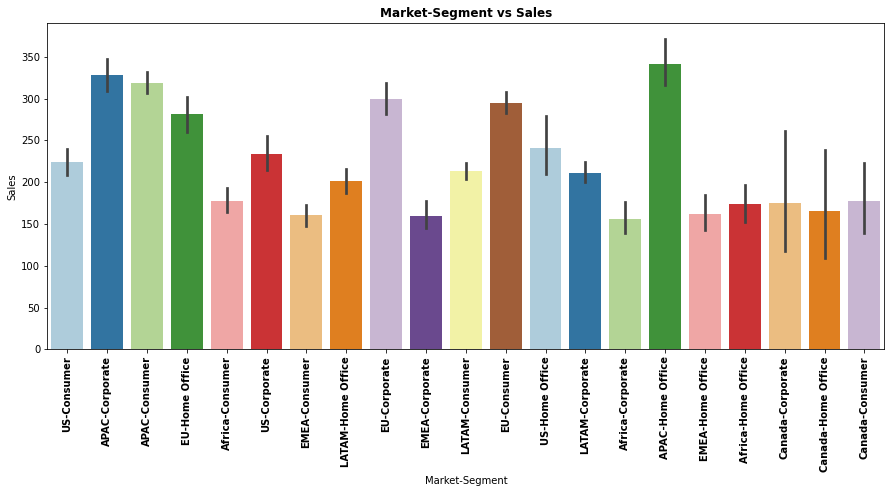

In [20]:
# Market-Segment V/s Sales

plt.figure(figsize=(15,6))
sns.barplot(x='Market-Segment', y= 'Sales', data=df, palette='Paired')
plt.title('Market-Segment vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- The highest sales is for APAC-Home Office segment
- In general APAC dominates the sales

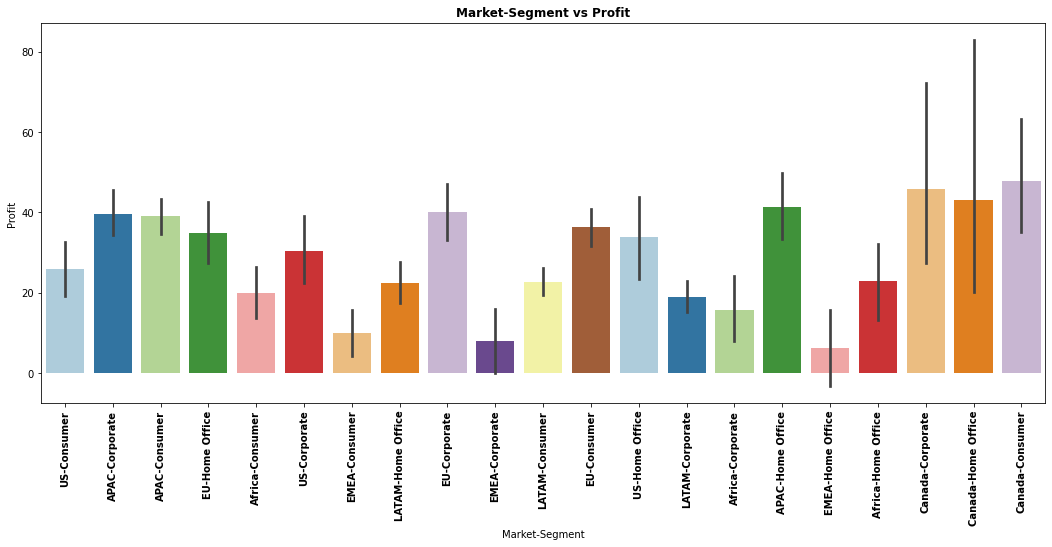

In [21]:
# Market-Segment V/s Profit

plt.figure(figsize=(18,7))
sns.barplot(x='Market-Segment', y= 'Profit', data=df, palette='Paired')
plt.title('Market-Segment vs Profit', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- Canada-corporate has the highest sales
- Canada and APAC seems to have higher profits than other markets

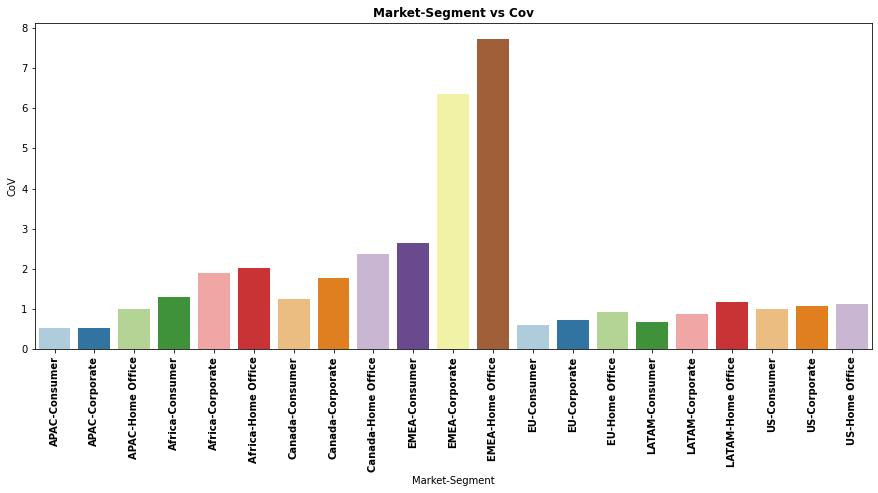

In [22]:
# Market-Segment V/s CoV

plt.figure(figsize=(15,6))
sns.barplot(x='Market-Segment', y= 'CoV', data=cov, palette='Paired')
plt.title('Market-Segment vs Cov', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- Clearly APAC-Consumer has the lowest CoV and is the profitable market segment

### Filtering Data for the Best Market Segment

- APAC-Consumer

In [23]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [24]:
# Filtering for APAC-Consumer and storing it in a new dataframe

df1 = df[(df['Market-Segment']=='APAC-Consumer')]

df1.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC-Consumer
6,2011-07,Consumer,APAC,1822.080,564.840,APAC-Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC-Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC-Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC-Consumer


In [25]:
# For time series analysis current only the Order date and Sales column is required

df1 = df1[['Order Date', 'Sales']]

df1.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [26]:
# Grouping based on the date

data = df1.groupby('Order Date').sum()

In [27]:
# changing to timestamp

data = data.to_timestamp()

In [28]:
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [30]:
data.shape

(48, 1)

### Time-series Analysis

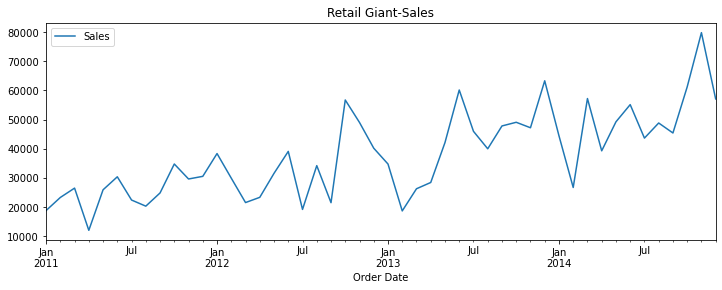

In [31]:
#Ploting the time-series data

data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant-Sales')
plt.show(block=False)

In [32]:
#Checking for the null value

data.isnull().sum()

Sales    0
dtype: int64

- There is no null values

In [33]:
# Splitting into train and test data for anlaysis

train_len = 42

train = data[0: train_len]
test = data[train_len:]

### Time Series Decomposition

- Additive sesonal decomposition
- Multiplicative seasonl decomposition

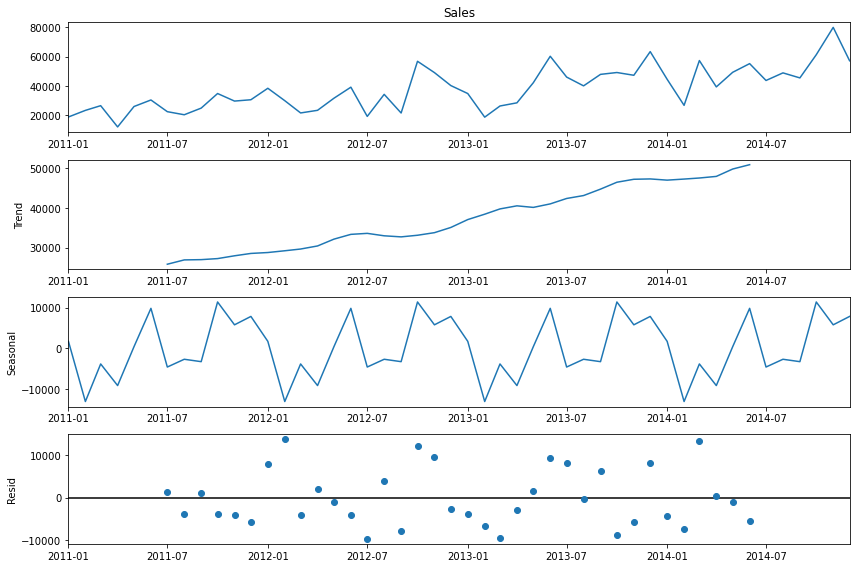

In [34]:
# Additive seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

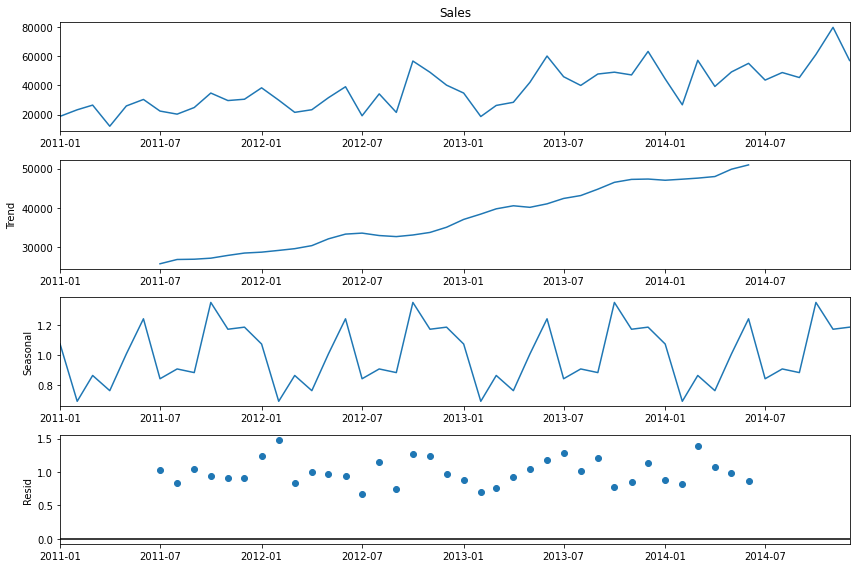

In [35]:
# Multiplicative seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(data.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()    

## Time Series Forcasting Methods

- since there are more than 10 historical observations ARIMA/ expontential smoothing techinques can be used
- But to know the results of other techniques we will be executing the simple time series methods as well

### 1. Naive Method

In [36]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

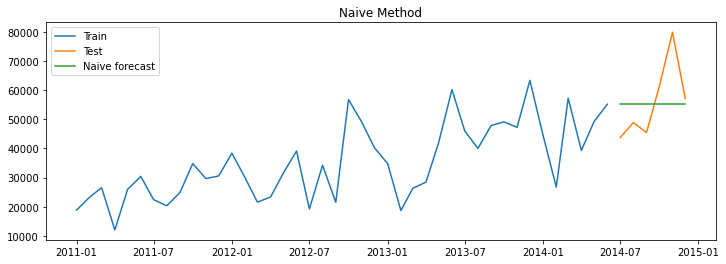

In [37]:
# ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [38]:
# Calculating the RMSE and MAPE values

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


### 2. Simple Average Method

In [39]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

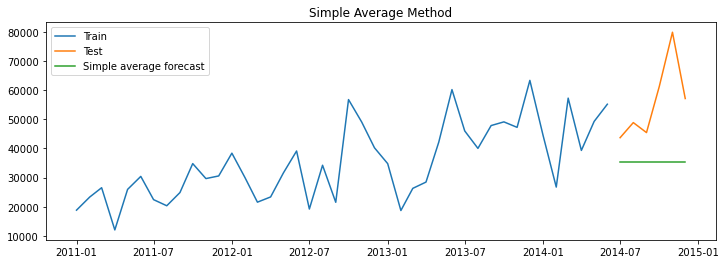

In [40]:
# ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [41]:
# Calculating the RMSE and MAPE values

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


### 3. Simple Moving Average Method

In [42]:
# considering three month window
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

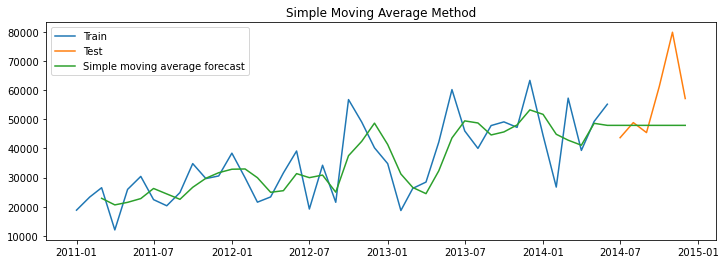

In [43]:
# ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [44]:
# Calculating the RMSE and MAPE for the simple moving average method

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


#### Among the above the simple moving average forcast method seems better. But as our data set contains more than 10 observations we will try to rely on the other methods for better prediction. 

## Exponential smoothing methods

### 4. Simple Exponential smoothing Method

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


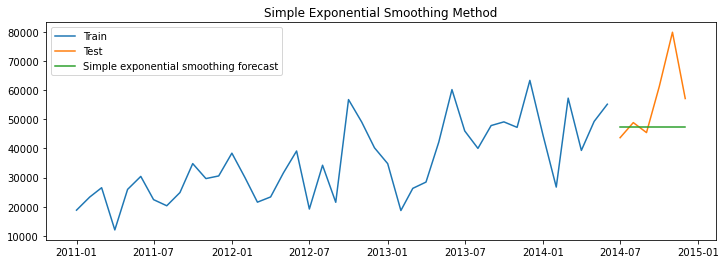

In [46]:
# ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [47]:
# Calcllating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99


### 5. Holt's Method with Trend

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


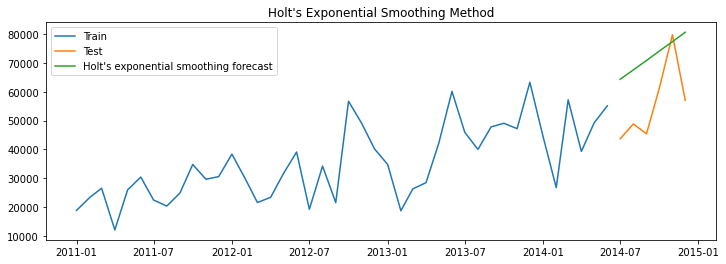

In [49]:
# ploting train, test and forcast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [50]:
# Calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57


### 6. Holt Winters' additive method with trend and seasonality


In [51]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07570161343785722, 'smoothing_trend': 0.010812706182841447, 'smoothing_seasonal': 0.10268263188872136, 'damping_trend': nan, 'initial_level': 34102.52453519938, 'initial_trend': 627.6061809457315, 'initial_seasons': array([-15283.10553412, -10806.90994778,  -7597.30974048, -22062.64499927,
        -8170.13649122,  -3709.10944122, -11681.8341073 , -13779.07773867,
        -9254.4641142 ,    676.7191065 ,  -4462.61598083,  -3555.20414538]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\silpa\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


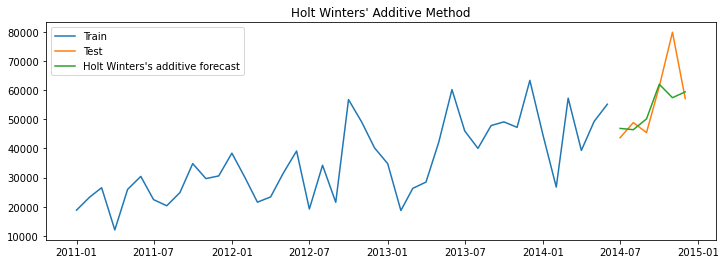

In [52]:
# Ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [53]:
# Calcuating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33


### 7. Holt Winter's multiplicative method with trend and seasonality

In [54]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\silpa\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


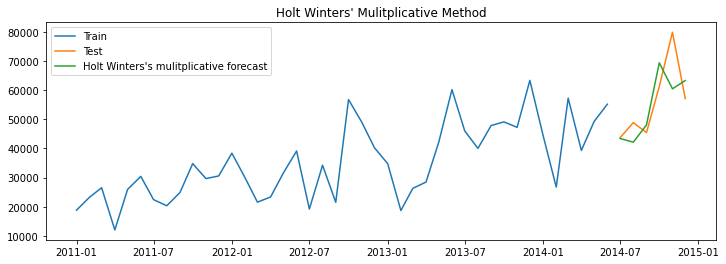

In [55]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [56]:
# calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33
0,Holt Winters' multiplicative method,9423.23,11.43


### From the smoothing techniques the Holt winter's additive method gives the better forcast for the 6 months

## Auto Regressive methods

### Stationarity vs non-stationary time series

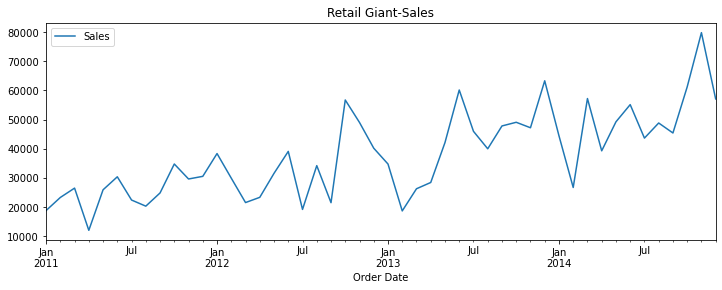

In [57]:
data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant-Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

- Null Hypothesis (H0) : The series is not stationary  p−value>0.05
- Alternate Hypothesis:(H1) The series is stationary  p−value<=0.05

In [58]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


#### - The p-value is 0.011804 which is below 0.05 and hence the null hypothesis is rejected and the series is stationary. 

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

- Null Hypothesis (H0) : The series is stationary  p−value>0.05 
- Alternate Hypothesis: (H1)  The series is not stationary  p−value<=0.05

In [59]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


#### - The p-value is 0.024720 which is below 0.05 and hence the null hypothesis is rejected and the series is not- stationary as per the KPSS test

#### KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

### Box Cox transformation to make variance constant

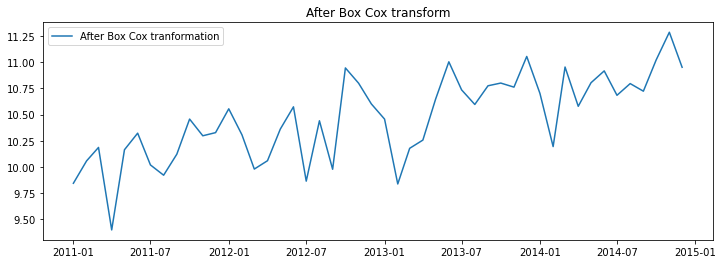

In [60]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

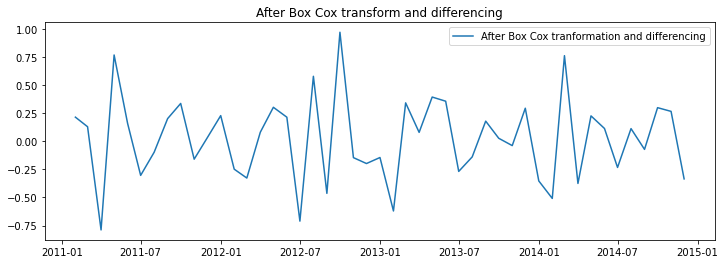

In [61]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

- The series looks stationary
- mean is centered around zero

In [62]:
data_boxcox_diff.dropna(inplace=True)

In [63]:
data_boxcox_diff.tail()  

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

### Augmented Dickey-Fuller (ADF) test

- after boxcox transformation and differencing

In [64]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


#### - The p-value is 0.000170 which is below 0.05 and hence the null hypothesis is rejected and the series is stationary.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

- after boxcox transformation and differencing

In [65]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\silpa\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


#### - The p-value is 0.1 which is above 0.05 and hence the series is stationary.

## Autocorrelation function (ACF)

- Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.
- it included direct and indirect dependencies

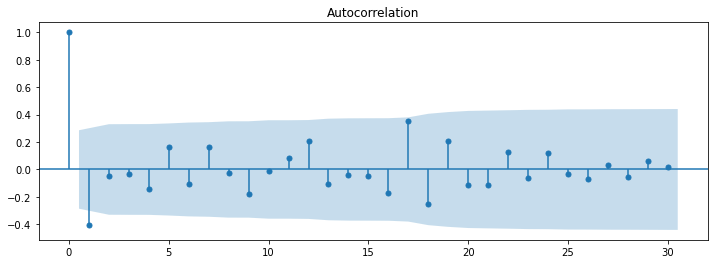

In [66]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

- PACF only describes the direct relationship

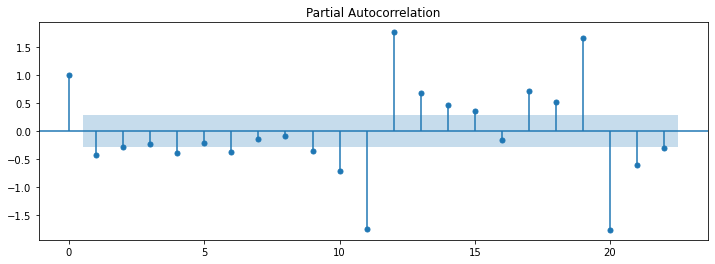

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()

In [68]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [69]:
train_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
Freq: MS, dtype: float64

### 7. Auto regression method (AR)

In [70]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [71]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

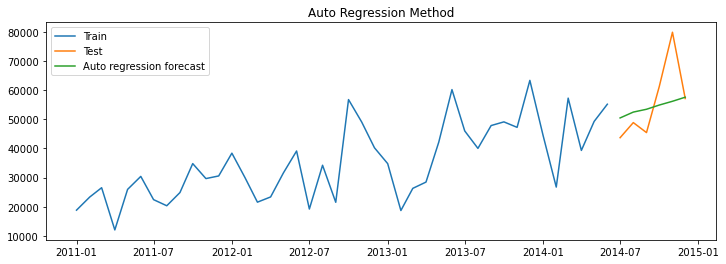

In [72]:
# Ploting the train, test, forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [73]:
# We could capture the trend but could not capture the seasonality. 

In [74]:
# calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


### 8. Moving average method (MA)

In [75]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series


In [76]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

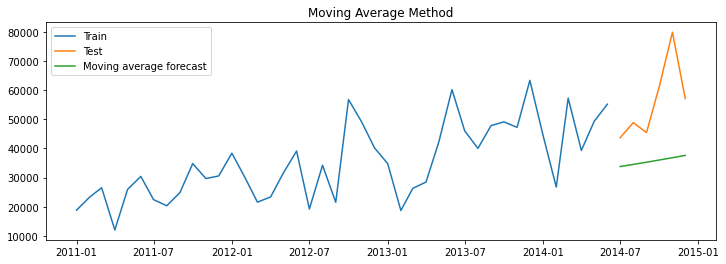

In [77]:
# ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(data['Sales'][:train_len], label='Train')
plt.plot(data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [78]:
# Calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


### 9. Auto regression moving average method (ARMA)

In [79]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [80]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

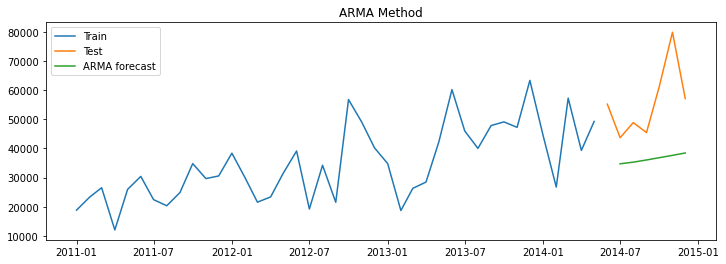

In [81]:
# Ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [82]:
# Calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### 10. Auto regressive integrated moving average (ARIMA)

In [83]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [84]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

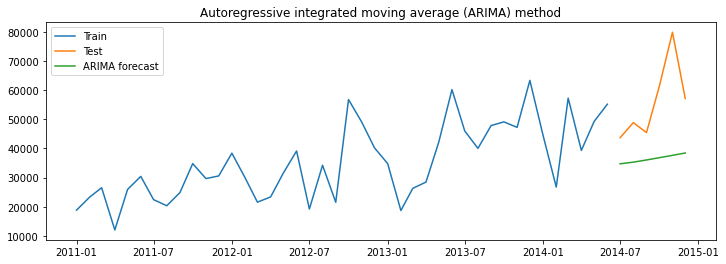

In [85]:
# Ploting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [86]:
# Calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### 11. Seasonal auto regressive integrated moving average (SARIMA)

- This model has both non-sesonal and seasonal components
- This has the seasonality feature

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041716
ma.L1      -0.994801
ar.S.L12    0.099793
ma.S.L12   -0.951084
sigma2      0.059590
dtype: float64


### Recover original time series forecast

In [88]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

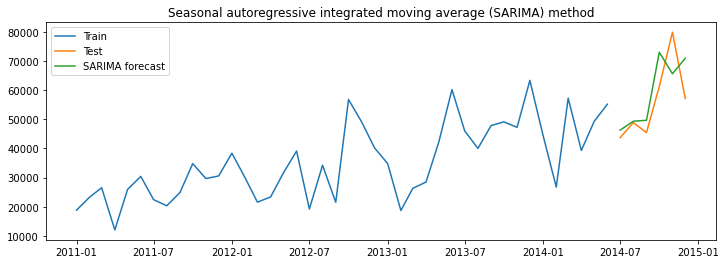

In [89]:
# plotting the train, test and forcast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [90]:
# Calculating the RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9555.61,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## Conclusion

- Since the data set had more than 10 historical observations, we can rely on the ARIMA and Exponential smoothing techniques
- In the exponential smoothing techniques, Holt winter's additive mehtod  does a better job in forcasting the sales
- In the ARIMA methods, SARIMA methods is better than others for forcasting the sales